In [7]:
import numpy as np
import math as mt
import pandas as pd
from scipy import stats
from numpy import random

df = pd.read_csv('C:/Users/Jeremy/Desktop/UT Data Analytics Course/5/C5T1/default of credit card clients.csv', index_col = 0, header = 1)

df.head()
df.columns



Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262F3294208>]],
      dtype=object)

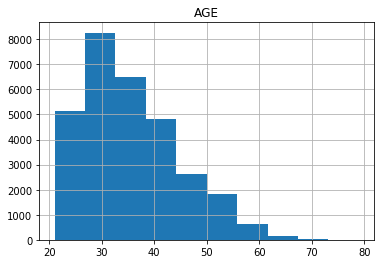

In [12]:
df.hist(column='AGE')

In [18]:
#df['SEX'].value_counts()
df['AGE'].mean()
#df['EDUCATION'].value_counts()
#df['MARRIAGE'].value_counts()

35.4855